Dataset Link - https://www.kaggle.com/budincsevity/szeged-weather
    
    
Content:
The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.

Data available in the hourly response:

time,
summary,
precipType,
temperature,
apparentTemperature,
humidity,
windSpeed,
windBearing,
visibility,
loudCover,
pressure,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Swarupa\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.shape

(96453, 12)

# Missing value

In [4]:
features_nan = [features for features in df.columns if df[features].isnull().sum()>=1]
features_nan

['Precip Type']

In [5]:
# Fetching Precip Type columns value 
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [6]:
# Fetching Precip Type columns value count
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [7]:
#Using Mode to handle nan values.
df['Precip Type'] = df['Precip Type'].fillna(df['Precip Type'].mode()[0])

In [8]:
df['Precip Type'].isnull().sum()

0

--Observation : So there is only one column having null values and by using Mode we can slove Null values/Missing value problem 

# EDA
1.Seprating Numerical and Categorical Features

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [10]:
categorical_feature = [feature for feature in df if df[feature].dtypes=='O']
categorical_feature

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [11]:
# Mapping Classes categorical features into numerical feature
df['Precip Type'] = df['Precip Type'].map({'rain':1, 'snow':0})

In [12]:
df['Precip Type'].unique()

array([1, 0], dtype=int64)

In [13]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [14]:
len(df['Summary'].unique())

27

In [15]:
#Seprating Formated date
df['Formatted Date']

0        2006-04-01 00:00:00.000 +0200
1        2006-04-01 01:00:00.000 +0200
2        2006-04-01 02:00:00.000 +0200
3        2006-04-01 03:00:00.000 +0200
4        2006-04-01 04:00:00.000 +0200
                     ...              
96448    2016-09-09 19:00:00.000 +0200
96449    2016-09-09 20:00:00.000 +0200
96450    2016-09-09 21:00:00.000 +0200
96451    2016-09-09 22:00:00.000 +0200
96452    2016-09-09 23:00:00.000 +0200
Name: Formatted Date, Length: 96453, dtype: object

--Observation - By using feature engineering process we can seprate Formatted Date into three seprate columns 

In [16]:
##Fetaure Engineering Process
df['Year']=df['Formatted Date'].str.split('-').str[0]
df['Month']=df['Formatted Date'].str.split('-').str[1]
df['Date']=df['Formatted Date'].str.split('-').str[2]

In [17]:
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,04,01 00:00:00.000 +0200
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,04,01 01:00:00.000 +0200
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,04,01 02:00:00.000 +0200


In [18]:
df['Date'] = df['Date'].str.split(' ').str[0]

In [19]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [20]:
# Dropping Formatted Date column
df= df.drop(['Formatted Date'],axis=1)

In [21]:
df.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Date
0,Partly Cloudy,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,4,1
1,Partly Cloudy,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,4,1
2,Mostly Cloudy,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1


In [22]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary', 'Year', 'Month', 'Date'],
      dtype='object')

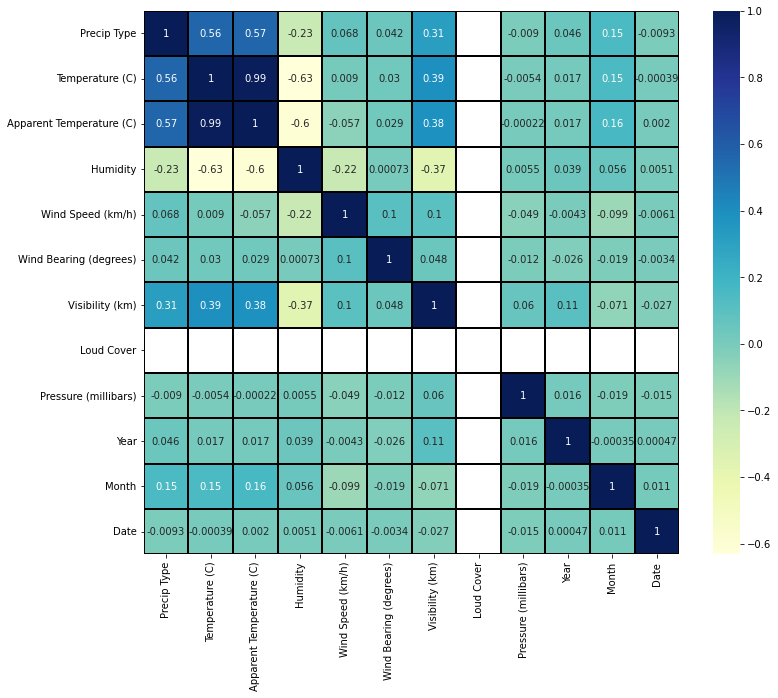

In [23]:
# Finding correlation between Idependant features
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,annot= True, cmap="YlGnBu",linewidths=2, linecolor='black')
plt.show()

-- Observation As feature Apparent Temperature (C)is highly co-realted with Temperature (C) we can drop that feature

In [24]:
df=df.drop(['Apparent Temperature (C)'],axis=1)

In [25]:
categorical_feature = [feature for feature in df if df[feature].dtypes=='O']
categorical_feature

['Summary', 'Daily Summary']

In [27]:
df=df.drop(['Daily Summary','Summary','Loud Cover','Date'],axis=1)

Observation - 'Loud Cover' data is mostly zero and we can use 'Month' n 'Year' feature insted of 'Date' also 'Daily Summary','Summary' are not realvent to other data so we can drop thses features.

In [70]:
numerical_feature = [feature for feature in df if df[feature].dtypes!='O']
numerical_feature

['Precip Type',
 'Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)',
 'Year',
 'Month']

In [28]:
df.head(2)

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year,Month
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,2006,4
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,2006,4


C:\Users\Swarupa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year', ylabel='count'>

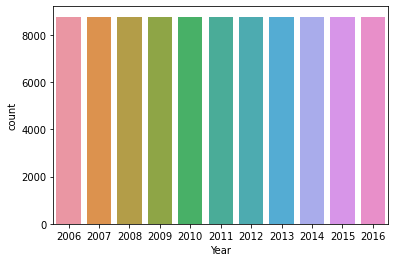

In [29]:
sns.countplot(df['Year'])

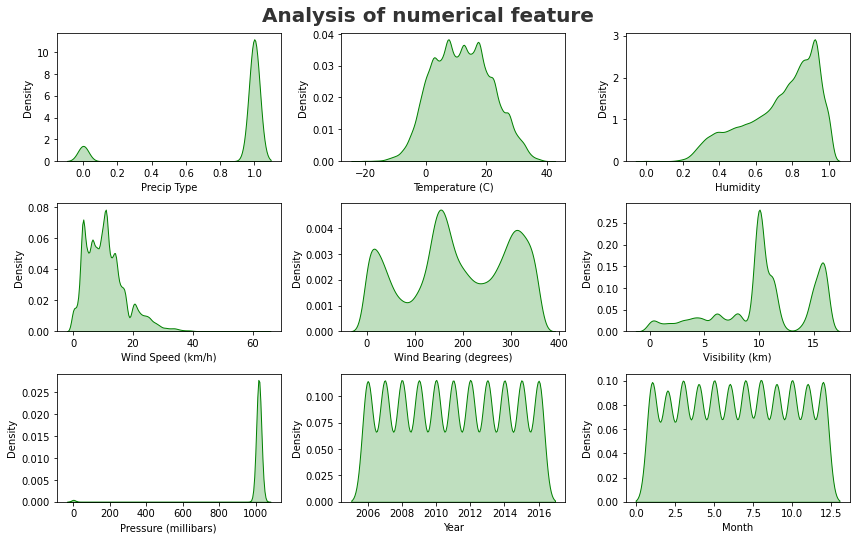

In [76]:
plt.figure(figsize=(12,12))
plt.suptitle('Analysis of numerical feature',fontsize=20,fontweight='bold',alpha=0.8)

for i in range (0, len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True,color='g')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

In [30]:
X=df.loc[:, df.columns.drop(['Temperature (C)'])]

In [31]:
X.head()

,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year,Month
0,1,0.89,14.1197,251.0,15.8263,1015.13,2006,4
1,1,0.86,14.2646,259.0,15.8263,1015.63,2006,4
2,1,0.89,3.9284,204.0,14.9569,1015.94,2006,4
3,1,0.83,14.1036,269.0,15.8263,1016.41,2006,4
4,1,0.83,11.0446,259.0,15.8263,1016.51,2006,4


In [32]:
y=df.iloc[:,1]

In [33]:
y.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state=4)

In [35]:
X_train.shape

(67517, 8)

In [36]:
X_test.shape

(28936, 8)

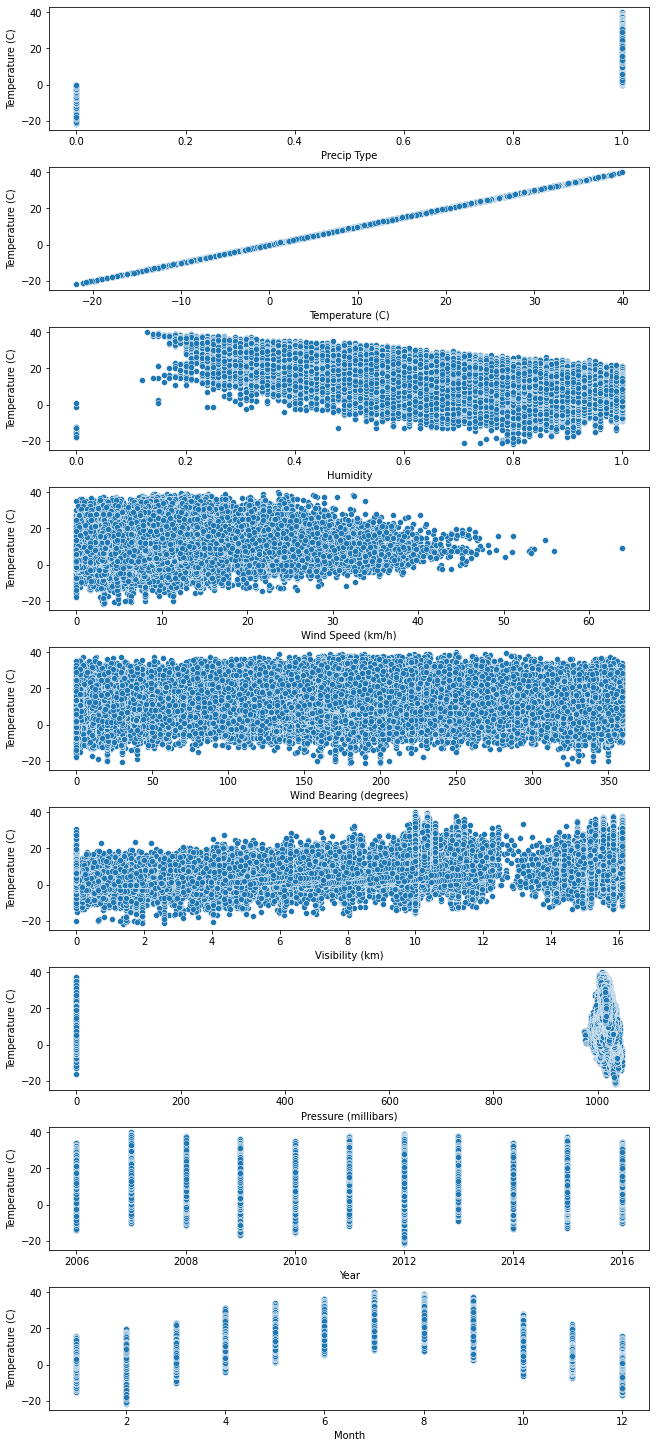

In [48]:
# Visualization of all independant feature with dependeat feature 
data1=df.copy()
fig,ax= plt.subplots(9,figsize=(9,20),constrained_layout = True)
count = 0
for i in data1.columns:
#     print(i)
    sns.scatterplot(x=i,y='Temperature (C)',data = data1, ax=ax[count])
    count+=1

# Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [40]:
X_train= sc.fit_transform(X_train)

In [41]:
X_train

array([[ 0.3513256 , -0.2757624 ,  0.71237272, ...,  0.11500218,
        -1.57945552,  0.42653387],
       [ 0.3513256 , -0.5815903 ,  0.85684592, ...,  0.13516072,
         0.31582373,  0.71716439],
       [ 0.3513256 ,  0.99852052, -0.41778052, ...,  0.13167338,
        -0.31593602,  1.00779491],
       ...,
       [ 0.3513256 , -0.73450425, -1.10286311, ...,  0.06056562,
         1.57934324, -0.15472717],
       [ 0.3513256 , -0.53061898, -1.1005329 , ...,  0.08701839,
         0.94758349,  0.13590335],
       [ 0.3513256 ,  0.38686472, -0.5948767 , ...,  0.18219731,
         1.26346336,  0.13590335]])

In [42]:
X_test= sc.transform(X_test)

In [43]:
X_test

array([[-2.8463625 ,  0.94754921,  0.00398801, ...,  0.044745  ,
        -0.31593602, -1.31724925],
       [ 0.3513256 ,  0.79463526, -0.93974821, ...,  0.1235079 ,
         1.26346336,  1.00779491],
       [ 0.3513256 ,  0.48880736, -0.38515754, ...,  0.09399307,
        -1.57945552,  1.58905595],
       ...,
       [ 0.3513256 , -0.17381976,  0.02262971, ...,  0.06371274,
        -0.94769577, -0.73598821],
       [ 0.3513256 , -0.68353293,  1.43240851, ...,  0.17870997,
        -1.26357565,  1.29842543],
       [ 0.3513256 ,  0.99852052, -0.20107072, ...,  0.13099292,
        -0.63181589,  1.00779491]])

# Model Selection

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [49]:
models={
    'Random_forest':RandomForestRegressor(),
    'Decision_tree':DecisionTreeRegressor(),
    'KNN':KNeighborsRegressor(),
    'Gradient_boosting':GradientBoostingRegressor(),
    'SVM':SVR(),
    'Adaboost':AdaBoostRegressor(),
    'Ridge_reg':Ridge(),
    'Lasso_reg':Lasso()
    
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #making prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    #Training set performance accuracy
    model_train_r2_score= r2_score(y_train,y_train_pred)
    model_train_mean_absolute_error= mean_absolute_error(y_train,y_train_pred)
    model_train_mean_squared_error= mean_squared_error(y_train,y_train_pred)
   
    #Test set performance accuracy
    model_test_r2_score = r2_score(y_test,y_test_pred)
    model_test_mean_absolute_error = mean_absolute_error(y_test,y_test_pred)
    model_test_mean_squared_error = mean_squared_error(y_test,y_test_pred)
    
    
    print(list(models.values())[i])
    print("Model accuracy for training set")
    print('- r2_score:{:.4f}'.format(model_train_r2_score))
    print('- mean_absolute_error:{:.4f}'.format(model_train_mean_absolute_error))
    print('- mean_squared_error:{:.4f}'.format(model_train_mean_squared_error))
    
    
    print("-------------------------------------------------------------")
   
    print(list(models.values())[i])
    print("Model accuracy for testing set")
    print('- r2_score:{:.4f}'.format(model_test_r2_score))
    print('- mean_absolute_error:{:.4f}'.format(model_test_mean_absolute_error))
    print('- mean_squared_error:{:.4f}'.format(model_test_mean_squared_error))
    
   
    print("="*35)
    print('\n')

RandomForestRegressor()
Model accuracy for training set
- r2_score:0.9916
- mean_absolute_error:0.6393
- mean_squared_error:0.7664
-------------------------------------------------------------
RandomForestRegressor()
Model accuracy for testing set
- r2_score:0.9410
- mean_absolute_error:1.6999
- mean_squared_error:5.3424


DecisionTreeRegressor()
Model accuracy for training set
- r2_score:1.0000
- mean_absolute_error:0.0000
- mean_squared_error:0.0000
-------------------------------------------------------------
DecisionTreeRegressor()
Model accuracy for testing set
- r2_score:0.8825
- mean_absolute_error:2.2056
- mean_squared_error:10.6404


KNeighborsRegressor()
Model accuracy for training set
- r2_score:0.9327
- mean_absolute_error:1.8454
- mean_squared_error:6.1582
-------------------------------------------------------------
KNeighborsRegressor()
Model accuracy for testing set
- r2_score:0.8960
- mean_absolute_error:2.2977
- mean_squared_error:9.4201


GradientBoostingRegressor()


In [ ]:
GradientBoostingRegressor :0.8890
-----------------------------------------
KNeighborsRegressor       :0.8960
-----------------------------------------
DecisionTreeRegressor     :0.8825
-----------------------------------------
RandomForestRegressor     :0.9410
-----------------------------------------
SVR                       :0.8803
-----------------------------------------
AdaBoostRegressor         :0.8127
-----------------------------------------
Lasso                     :0.5725
-----------------------------------------
Ridge                     :0.6225
-----------------------------------------
        
    

-- Here Random forest regressor accuracy is good than other models so we can go with Random forest regressor.


# Pickle

In [50]:
import pickle
pickle.dump(model,open('temp_pred_model.pkl','wb'))

In [51]:
pickle_reg_model= pickle.load(open('temp_pred_model.pkl','rb'))

In [55]:
X_test[14]

array([ 0.3513256 ,  1.35531974, -0.65080181, -0.6260013 , -1.66080286,
        0.15472386,  0.31582373,  1.29842543])

In [61]:
data_dict={     'Precip Type':  0.3513256 ,
                'Humidity':   1.35531974,
                "Wind Speed (km/h)"    :-0.65080181,
                "Wind Bearing (degrees)"   :-0.6260013,
                "Visibility (km)"  :-1.66080286,
                "Pressure (millibars)"   :0.15472386,
                "Year"   :0.31582373,
               "Month":1.29842543
          }

In [62]:
data_dict.values()

dict_values([0.3513256, 1.35531974, -0.65080181, -0.6260013, -1.66080286, 0.15472386, 0.31582373, 1.29842543])

In [63]:
list(data_dict.values())

[0.3513256,
 1.35531974,
 -0.65080181,
 -0.6260013,
 -1.66080286,
 0.15472386,
 0.31582373,
 1.29842543]

In [64]:
pickle_reg_model.predict([list(data_dict.values())])

array([7.32571644])